## **4장**
#### **04-05** GBM(Gradient BoostingMachine)

- **부스팅 알고리즘** : 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해나가면서 학습하는 방식.
    - **에이다부스트**- AdaBoost(Adaptve boosting) : 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘
    - **그래디언트 부스트** : 가중치 업데이트를 경사 하강법(Gradient Descent)를 이용함.
        - 오류값 = 실제값 - 예측값

사이킷런에서는 GBM 기반의 분류를 위한 GradientBoostingClassifier 클래스를 제공함!


##### GBM을 이용한 사용자 행동 데이터 세트의 예측 분류 실습

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('/content/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:, 1].values.tolist()

In [6]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                              'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                    if x[1] > 0 else x[0] , axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [7]:
def get_human_dataset():
    feature_name_df = pd.read_csv('/content/features.txt',sep='\s+', header=None, names=['column_index', 'column_name'])

    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    X_train = pd.read_csv('/content/X_train.txt' , sep='\s+', names=feature_name)
    X_test = pd.read_csv('/content/X_test.txt', sep='\s+', names=feature_name)

    y_train = pd.read_csv('/content/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('/content/y_test.txt', sep='\s+', header=None, names=['action'])

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [8]:
X_train.fillna(0)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [36]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위해 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행시간: {0:.1f}초'.format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행시간: 1402.1초


###### GridSearchCV를 이용한 하이퍼 파라미터 최적화

In [42]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 150],
    'learning_rate' : [0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.bestparams_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cvbest_score))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


KeyboardInterrupt: 

###### **04-06** XGBoost(eXtra Gradient Boost)

- GBM의 느린 수행 시간 및 과적합 규제 부재 등의 문제 해결.
- 병렬 CPU 환경에서 병렬 학습이 가능함
    - 기존 GBM보다 빠르게 학습을 완료할 수 있음.

- **장점**
    - 뛰어난 예측 성능: 일반적으로 분류&회귀 영역에서 뛰어난 예측 성능 발휘
    - **GBM 대비** 빠른 수행 시간
    - 과적합 규제
    - Tree pruning(나무 가지치기): 지나치게 많은 분할의 발생을 방지.
    - 자체 내장된 교차 검증
    - 결손값 자체 처리

In [9]:
import xgboost as xgb
from xgboost import XGBClassifier

###### 파이썬 래퍼 XGBoost 하이퍼 파라미터

- 주요 일반 파라미터
    - booster: gbtree(tree based model) / gblinear(linear model) 선택. 디폴트는 gbtree.
    - silent: 디폴트는 0. 출력 메세지 나타내고 싶지 않으면 1로 설정.
    - nthread: CPU의 실행 스레드 개수 조정. 디폴트는 전체 스레드 사용.

In [10]:
import xgboost
print(xgboost.__version__)

2.0.3


###### 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

In [11]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [12]:
# 레이블값 분포 확인
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [13]:
# 데이터세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size = 0.2, random_state = 156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [14]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터 세트를 DMatrix로 변환하기
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [15]:
params ={'max_depth':3, 'eta': 0.1,
        'objective':'binary:logistic',
        'eval_metric': 'logloss',
        'early_stoppings':100
    }

num_rounds = 400

In [16]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, \
                      early_stopping_rounds=100, evals=wlist)

[0]	train-logloss:0.58431	eval-logloss:0.56554
[1]	train-logloss:0.51885	eval-logloss:0.50669
[2]	train-logloss:0.46457	eval-logloss:0.45868
[3]	train-logloss:0.41713	eval-logloss:0.41822
[4]	train-logloss:0.37585	eval-logloss:0.38103
[5]	train-logloss:0.34075	eval-logloss:0.35137
[6]	train-logloss:0.31028	eval-logloss:0.32588
[7]	train-logloss:0.28283	eval-logloss:0.30127
[8]	train-logloss:0.25925	eval-logloss:0.28197
[9]	train-logloss:0.23822	eval-logloss:0.26265
[10]	train-logloss:0.21951	eval-logloss:0.24821
[11]	train-logloss:0.20251	eval-logloss:0.23231
[12]	train-logloss:0.18759	eval-logloss:0.22079
[13]	train-logloss:0.17386	eval-logloss:0.20795
[14]	train-logloss:0.16199	eval-logloss:0.19764
[15]	train-logloss:0.15109	eval-logloss:0.18950
[16]	train-logloss:0.14056	eval-logloss:0.18052
[17]	train-logloss:0.13137	eval-logloss:0.17246
[18]	train-logloss:0.12329	eval-logloss:0.16512
[19]	train-logloss:0.11565	eval-logloss:0.15828
[20]	train-logloss:0.10860	eval-logloss:0.15436
[2

In [17]:
# 테스트 데이터 예측 수행
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds=[1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.904 0.004 0.908 0.267 0.992 1.    1.    0.999 0.994 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [18]:
# get_clf_eval() 함수 호출

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision =precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f},정밀도:{1:.4f},재현율:{2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

In [19]:
get_clf_eval(y_test, preds)

오차행렬
[[34  3]
 [ 1 76]]
정확도:0.9649,정밀도:0.9620,재현율:0.9870, F1:0.9744


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

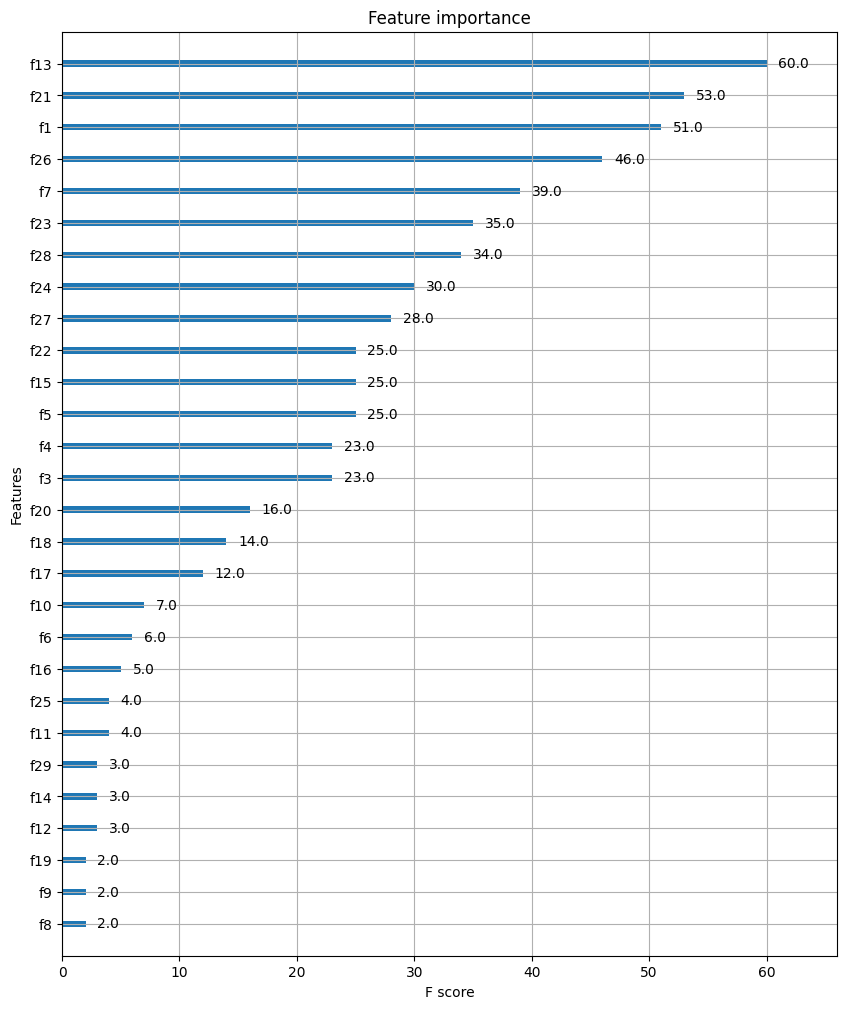

In [20]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt. subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

In [21]:
xgboost.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, metrics=(), obj=None, feval=None, maximize=False, early_stopping_rounds=None, fpreproc=None, as_pandas=True,
verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.584737,0.005961,0.592041,0.008024
1,0.517898,0.004745,0.532735,0.007335
2,0.462199,0.003589,0.483123,0.008418
3,0.415639,0.003043,0.441435,0.011510
4,0.375350,0.002036,0.406194,0.014400
5,0.340102,0.000854,0.373831,0.015171
6,0.308902,0.000900,0.348411,0.018183
7,0.281927,0.001335,0.324136,0.017817
8,0.257775,0.001182,0.304679,0.021239
9,0.236439,0.001313,0.286202,0.021203


###### 사이킷런 래퍼 XGBoost의 개요 및 적용
- XGBClassifier : 분류를 위한 래퍼 클래스
- XGBRegressor : 회귀를 위한 래퍼 클래스
- n_estimators(XGBClassifier에서 적용) = num_boost_round(두 개 동시 사용 시 적용)

In [22]:
# XGBClassifier 이용한 예측
from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [23]:
get_clf_eval(y_test, w_preds)

오차행렬
[[35  2]
 [ 1 76]]
정확도:0.9737,정밀도:0.9744,재현율:0.9870, F1:0.9806


In [24]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]

xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.56554
[1]	validation_0-logloss:0.50669
[2]	validation_0-logloss:0.45868
[3]	validation_0-logloss:0.41822
[4]	validation_0-logloss:0.38103
[5]	validation_0-logloss:0.35137
[6]	validation_0-logloss:0.32588
[7]	validation_0-logloss:0.30127
[8]	validation_0-logloss:0.28197
[9]	validation_0-logloss:0.26265
[10]	validation_0-logloss:0.24821
[11]	validation_0-logloss:0.23231
[12]	validation_0-logloss:0.22079
[13]	validation_0-logloss:0.20795
[14]	validation_0-logloss:0.19764
[15]	validation_0-logloss:0.18950
[16]	validation_0-logloss:0.18052
[17]	validation_0-logloss:0.17246
[18]	validation_0-logloss:0.16512
[19]	validation_0-logloss:0.15828
[20]	validation_0-logloss:0.15436
[21]	validation_0-logloss:0.14633
[22]	validation_0-logloss:0.13936
[23]	validation_0-logloss:0.13393
[24]	validation_0-logloss:0.13015
[25]	validation_0-logloss:0.12489
[26]	validation_0-logloss:0.12206
[27]	validation_0-logloss:0.11890
[28]	validation_0-logloss:0.11637
[29]	validation_0-loglos

In [25]:
get_clf_eval(y_test, ws100_preds)

오차행렬
[[34  3]
 [ 1 76]]
정확도:0.9649,정밀도:0.9620,재현율:0.9870, F1:0.9744


In [26]:
# 재학습
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, ws10_preds)

[0]	validation_0-logloss:0.56554
[1]	validation_0-logloss:0.50669
[2]	validation_0-logloss:0.45868
[3]	validation_0-logloss:0.41822
[4]	validation_0-logloss:0.38103
[5]	validation_0-logloss:0.35137
[6]	validation_0-logloss:0.32588
[7]	validation_0-logloss:0.30127
[8]	validation_0-logloss:0.28197
[9]	validation_0-logloss:0.26265
[10]	validation_0-logloss:0.24821
[11]	validation_0-logloss:0.23231
[12]	validation_0-logloss:0.22079
[13]	validation_0-logloss:0.20795
[14]	validation_0-logloss:0.19764
[15]	validation_0-logloss:0.18950
[16]	validation_0-logloss:0.18052
[17]	validation_0-logloss:0.17246
[18]	validation_0-logloss:0.16512
[19]	validation_0-logloss:0.15828
[20]	validation_0-logloss:0.15436
[21]	validation_0-logloss:0.14633
[22]	validation_0-logloss:0.13936
[23]	validation_0-logloss:0.13393
[24]	validation_0-logloss:0.13015
[25]	validation_0-logloss:0.12489
[26]	validation_0-logloss:0.12206
[27]	validation_0-logloss:0.11890
[28]	validation_0-logloss:0.11637
[29]	validation_0-loglos

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

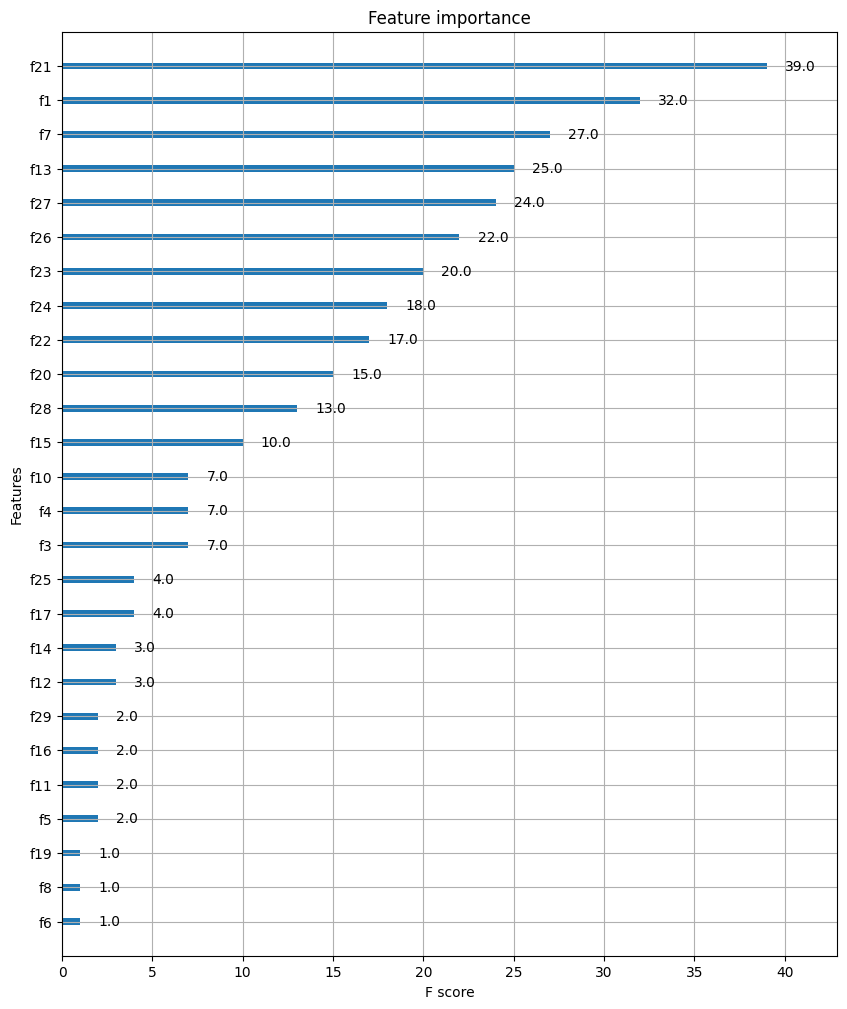

In [27]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax)

###### **04-07** LightGBM
- 리프 중심 트리 분할 방식 사용.
    - 트리 균형 맞추지 X
    - 최대 손실 값을 가지는 리프 노드를 지속적으로 분할.
        - 트리의 깊이가 깊어짐
        - 비대칭적인 규칙 트리가 생성됨
        - 예측 오류 손실을 최소화할 수 있음
- **장점**
    - XGBoost보다 학습에 걸리는 시간이 훨씬 적다.
    - 메모리 사용량도 상대적으로 적다.

###### LightGBM 하이퍼 파라미터
- 트리 특성에 맞는 하이퍼 파라미터 설정이 필요함.(max_depth를 매우 크게 가짐)

###### 하이퍼 파라미터 튜닝 방안
num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf),max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방안.
- n_estimators를 너무 크게 하면 과적합으로 이어질 수 있음

###### 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교
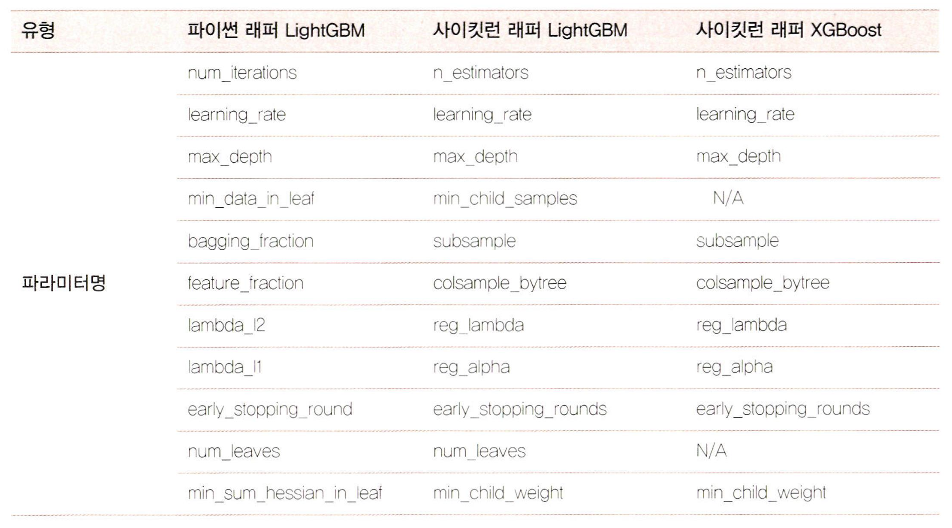

###### LightGBM 적용 - 위스콘신 유방암 예측

In [28]:
!pip install lightgbm==3.3.2

In [29]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

lgbm_wrapper = LGBMClassifier()

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

In [30]:
get_clf_eval(y_test, preds)

오차행렬
[[33  4]
 [ 1 76]]
정확도:0.9561,정밀도:0.9500,재현율:0.9870, F1:0.9682


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

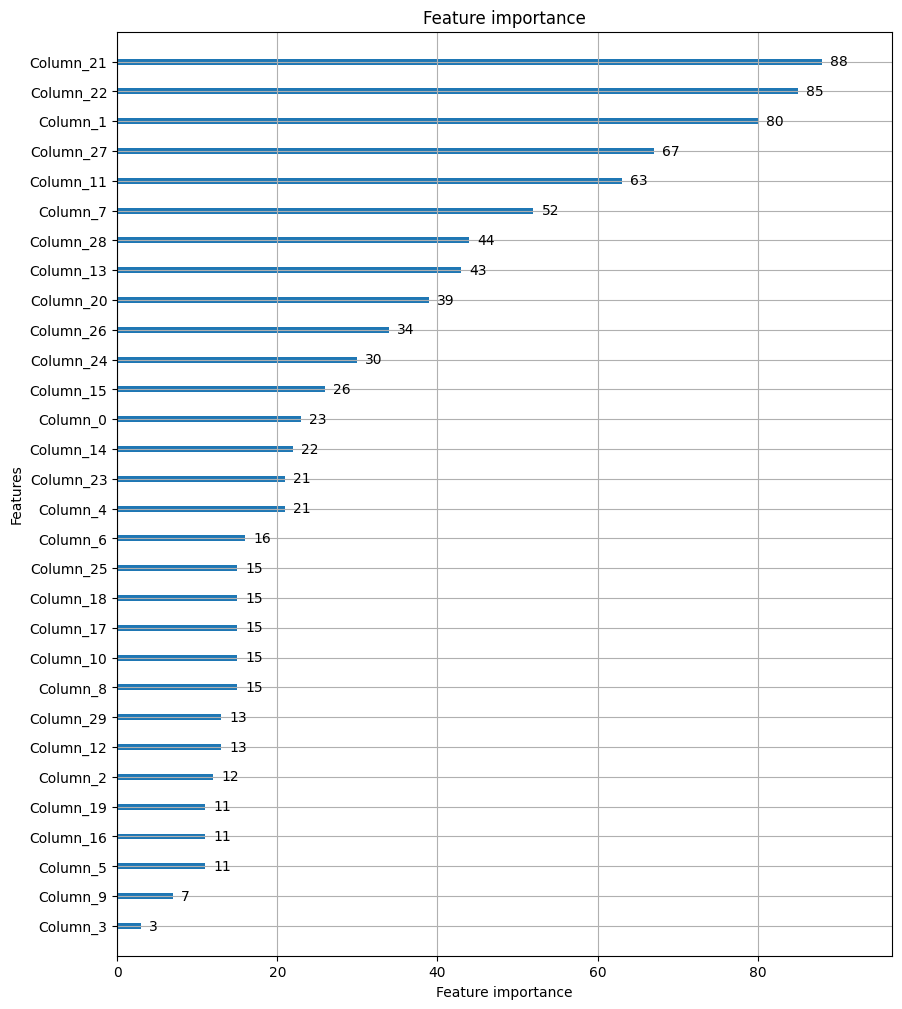

In [31]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

###### **04-08** 분류 실습 - 캐글 산탄데르 고객 만족 예측

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df =pd.read_csv('/content/train.csv', encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [33]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 Shape:{0}'.format(X_features.shape))

피처 데이터 Shape:(76020, 369)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()

print('학습 세트 Shape:{0},테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))
print('학습 세트 레이블값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369),테스트 세트 Shape:(15204, 369)
학습 세트 레이블값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


###### XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state=156)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')

print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83789	validation_1-auc:0.82554
[1]	validation_0-auc:0.84273	validation_1-auc:0.82878
[2]	validation_0-auc:0.84901	validation_1-auc:0.83359
[3]	validation_0-auc:0.85530	validation_1-auc:0.83767
[4]	validation_0-auc:0.85891	validation_1-auc:0.83909
[5]	validation_0-auc:0.86117	validation_1-auc:0.84156
[6]	validation_0-auc:0.86378	validation_1-auc:0.84138
[7]	validation_0-auc:0.86737	validation_1-auc:0.84048
[8]	validation_0-auc:0.87021	validation_1-auc:0.84162
[9]	validation_0-auc:0.87258	validation_1-auc:0.84100
[10]	validation_0-auc:0.87505	validation_1-auc:0.84117
[11]	validation_0-auc:0.87747	validation_1-auc:0.84111
[12]	validation_0-auc:0.87872	validation_1-auc:0.84114
[13]	validation_0-auc:0.88087	validation_1-auc:0.84066
[14]	validation_0-auc:0.88208	validation_1-auc:0.84014
[15]	validation_0-auc:0.88340	validation_1-auc:0.83965
[16]	validation_0-auc:0.88557	validation_1-auc:0.83950
[17]	validation_0-auc:0.88664	validation_1-auc:0.84013
[18]	validation_0-au

In [39]:
# ROC-AUC 수치의 향상 현황 확인
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7], 'min_child_weight':[1, 3], 'colsample_bytree': [0.5, 0.75]}

# cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=2)
gridcv.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터: ' , gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.80632	validation_1-auc:0.80469
[1]	validation_0-auc:0.80669	validation_1-auc:0.80677
[2]	validation_0-auc:0.80050	validation_1-auc:0.80268
[3]	validation_0-auc:0.79877	validation_1-auc:0.80247
[4]	validation_0-auc:0.82446	validation_1-auc:0.82221
[5]	validation_0-auc:0.83630	validation_1-auc:0.83077
[6]	validation_0-auc:0.84170	validation_1-auc:0.83537
[7]	validation_0-auc:0.84199	validation_1-auc:0.83374
[8]	validation_0-auc:0.84685	validation_1-auc:0.83644
[9]	validation_0-auc:0.84727	validation_1-auc:0.83513
[10]	validation_0-auc:0.84785	validation_1-auc:0.83348
[11]	validation_0-auc:0.85068	validation_1-auc:0.83523
[12]	validation_0-auc:0.85322	validation_1-auc:0.83712
[13]	validation_0-auc:0.85475	validation_1-auc:0.83727
[14]	validation_0-auc:0.85519	validation_1-auc:0.83697
[15]	validation_0-auc:0.85569	validation_1-auc:0.83655
[16]	validation_0-auc:0.85654	validation_1-auc:0.83601
[17]	validation_0-auc:0.85768	validation_1-auc:0.83645
[18]	validation_0-au

In [40]:
xgb_clf = XGBClassifier(n_estimators=100, random_state=156, learning_rate=0.02, max_depth=7, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')

print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.84570	validation_1-auc:0.82819
[1]	validation_0-auc:0.84118	validation_1-auc:0.82296
[2]	validation_0-auc:0.84774	validation_1-auc:0.82904
[3]	validation_0-auc:0.85009	validation_1-auc:0.83329
[4]	validation_0-auc:0.85195	validation_1-auc:0.83447
[5]	validation_0-auc:0.85234	validation_1-auc:0.83502
[6]	validation_0-auc:0.84945	validation_1-auc:0.83320
[7]	validation_0-auc:0.85042	validation_1-auc:0.83374
[8]	validation_0-auc:0.85098	validation_1-auc:0.83285
[9]	validation_0-auc:0.84973	validation_1-auc:0.83148
[10]	validation_0-auc:0.85060	validation_1-auc:0.83219
[11]	validation_0-auc:0.85187	validation_1-auc:0.83210
[12]	validation_0-auc:0.84997	validation_1-auc:0.83135
[13]	validation_0-auc:0.85146	validation_1-auc:0.83182
[14]	validation_0-auc:0.85342	validation_1-auc:0.83388
[15]	validation_0-auc:0.85422	validation_1-auc:0.83446
[16]	validation_0-auc:0.85580	validation_1-auc:0.83501
[17]	validation_0-auc:0.85613	validation_1-auc:0.83539
[18]	validation_0-au

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

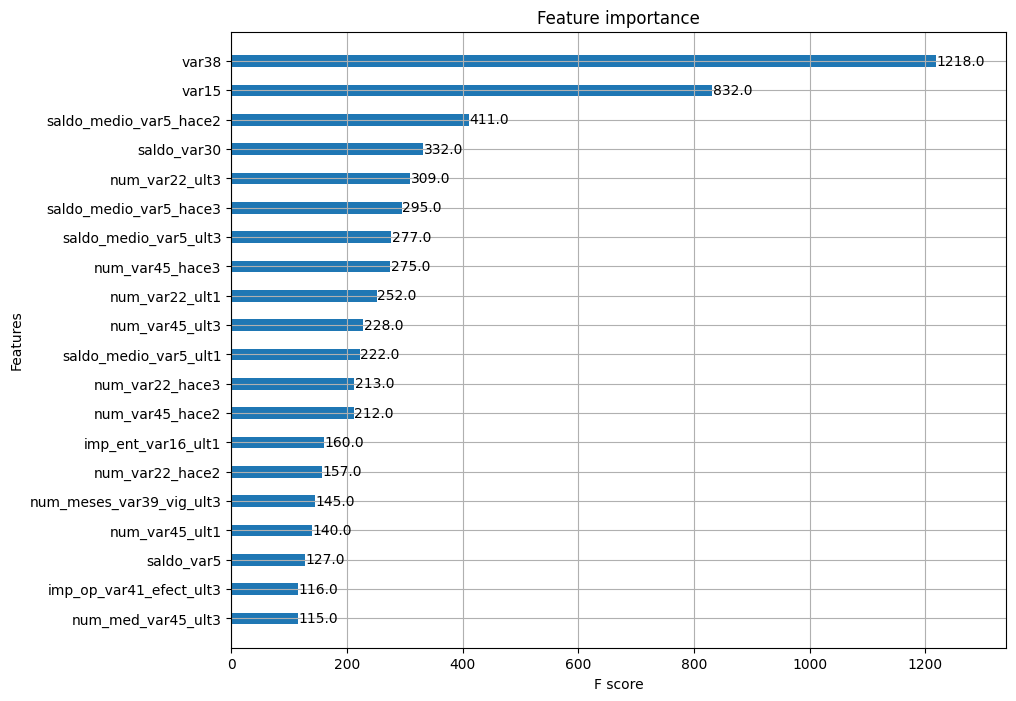

In [41]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax =plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

###### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [42]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)
evals =[(X_test, y_test)]

lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')

print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_logloss: 0.14161
[16]	valid_0's auc: 0.840337	valid_0's binary_loglo

In [46]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimators=200)
params ={'num_leaves': [32, 46],
        'max_depth': [128, 160],
        'min_child_samples': [60, 100],
        'subsample': [0.8, 1]}

gridcv =GridSearchCV(lgbm_clf, param_grid=params, cv=2)
gridcv.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])
print('Gridsearchcv 최적 파라미터:', gridcv.best_params_)

lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.818749	valid_0's binary_logloss: 0.156471	valid_1's auc: 0.809273	valid_1's binary_logloss: 0.16579
[2]	valid_0's auc: 0.823303	valid_0's binary_logloss: 0.151343	valid_1's auc: 0.816379	valid_1's binary_logloss: 0.16064
[3]	valid_0's auc: 0.82995	valid_0's binary_logloss: 0.147617	valid_1's auc: 0.823332	valid_1's binary_logloss: 0.156867
[4]	valid_0's auc: 0.836402	valid_0's binary_logloss: 0.144625	valid_1's auc: 0.829151	valid_1's binary_logloss: 0.154054
[5]	valid_0's auc: 0.836864	valid_0's binary_logloss: 0.14237	valid_1's auc: 0.829406	valid_1's binary_logloss: 0.151864
[6]	valid_0's auc: 0.842377	valid_0's binary_logloss: 0.140324	valid_1's auc: 0.834798	valid_1's binary_logloss: 0.149926
[7]	valid_0's auc: 0.843731	valid_0's binary_logloss: 0.13862	valid_1's auc: 0.835331	valid_1's binary_logloss: 0.14847
[8]	valid_0's auc: 0.845435	valid_0's binary_logloss: 0.137252	valid_1's auc: 0.836312	valid_1's binary_logloss: 0.147155
[9]	valid_0's auc: 0.847321	va

In [48]:
# ROC-AUC 측정 결과 도출
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100, max_depth=128, evals = [(X_test, y_test)])

lgbm_clf.fit(X_train, y_train, early_stopping_rounds=50, eval_metric="auc", eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')

print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] 2 is set=, 2= will be ignored. Current value: 2=
[LightGBM] [Warning] 23 is set=, 23= will be ignored. Current value: 23=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.00 is set=, 0.00= will be ignored. Current value: 0.00=
[LightGBM] [Warning] 2 is set=, 2= will be ignored. Current value: 2=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.00 is set=, 0.00= will be ignored. Current value: 0.00=
[LightGBM] [Warning] 2 is set=, 2= will be ignored. Current value: 2=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.00 is set=, 0.00= will be ignored. Current value: 0.00=
[LightGBM] [Warning] 2 is set=, 2= will be ignored. Current value: 2=
[LightGBM] [Warning] 0.0 is set=, 0.0= will be ignored. Current value: 0.0=
[LightGBM] [Warning] 0.00 is set=, 0.00= will be ignored. Current value: 0.00=
[LightGBM] [Warning] ... is

###### **04-09** 분류 실습 - 캐글 신용카드 사기 검출

- **언더 샘플링**: 많은 데이터 세트를 적은 데이터 세트 수준으로 감소시키는 방법
- **오버 샘플링**: 이상 데이터와 같이 적은 데이터 세트를 증식하여 학습을 위한 충분한 데이터를 확보하는 방식
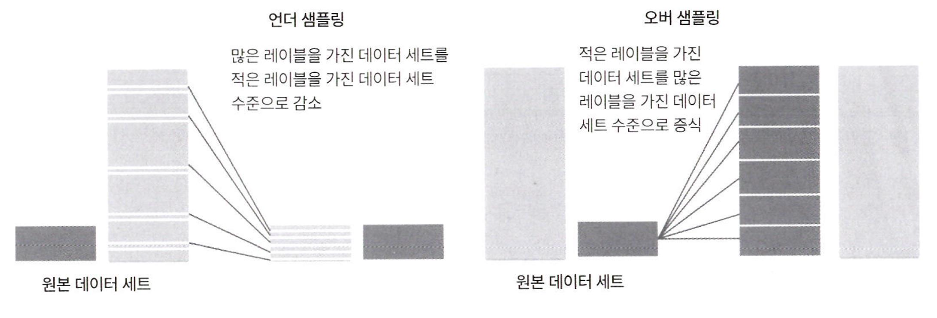

###### 데이터 일차 가공 및 모델 학습/예측/평가

###### **04-10** 스태킹 앙상블

**스태킹(Stacking)**

: 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출함.

: 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행함.

: 개별 알고리즘의 예측 결과 데이터 세트를 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종 학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측을 수행하는 방식(**메타 모델**)

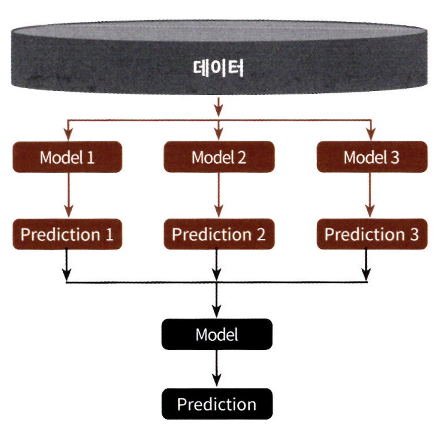

스태킹된 데이터 세트에 대해 최종 모델을 적용해 최종 예측을 하는 것이 **스태킹 앙상블 모델**

###### 기본 스태킹 모델

In [50]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()
X_data = cancer_data.data
y_label = cancer_data.target
X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

In [51]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 모델
lr_final = LogisticRegression(C=10)

# 개별 모델들을 학습.
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [53]:
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도:{0:.4f}'.format(accuracy_score(y_test,dt_pred)))
print('에이다 부스트 정확도:{0:.4f}'.format(accuracy_score(y_test,ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도:0.9035
에이다 부스트 정확도:0.9561


In [54]:
# 로지스틱 회귀에서 활용
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# 행과 열 위치 교환, 각 예측 결과를 피처로 만듬
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [55]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test,final)))

최종 메타 모델의 예측 정확도: 0.9649


###### CV 기반 스태킹 모델 - 도식화

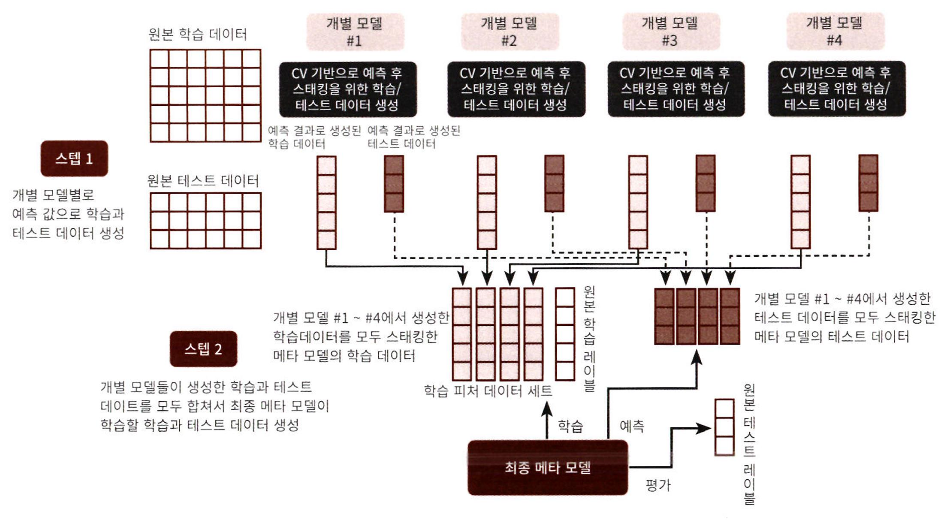

In [59]:
# 스텝 1

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds) :
    kf=KFold(n_splits=n_folds, shuffle=True, random_state=0)
    # 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, ' model 시작')

    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    # 데이터 세트 추출
        print('\t 폴드 세트: ', folder_counter , '시작')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]

        model.fit(X_tr, y_tr)

        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
        test_pred[:, folder_counter] = model.predict(X_test_n)

    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)

    return train_fold_pred, test_pred_mean

In [60]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
RandomForestClassifier  model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
DecisionTreeClassifier  model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
AdaBoostClassifier  model 시작
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작


In [61]:
# 스텝 2

Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:', X_train.shape,'원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape: ', Stack_final_X_train.shape, '스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape:  (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [62]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9649


###### +) 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝

In [67]:
# LightGBM의 6가지 하이퍼 파라미터를 최적화하기 위한 시도

params = {'max_depth' : [10, 20, 30, 40, 50], 'num_leaves' : [35, 45, 55, 65], 'colsample_bytree' : [0.5, 0.6, 0.7, 0.8, 0.9], 'subsample' : [0.5, 0.6, 0.7, 0.8, 0.9], 'min_child_weight' : [10, 20, 30, 40], 'reg_alpha' : [0.01, 0.05, 0.1]}

**베이지안 최적화**

: 베이지안 확률에 기반을 두고 있는 최적화 기법
- 새로운 데이터를 입력받았을 때 최적 함수를 예측하는 사후 모델을 개선해 나가면서 최적 함수 모델을 생성함.

    - **대체 모델(Surrogate Model)** : 획득 함수로부터 최적 함수를 예측할 수 있는 입력값을 추천받은 뒤 이를 기반으로 최적 함수 모델을 개선해나감.
        - 가우시안 프로세스(Gaussian Process) 적용
    - **획득 함수(Acquisition Function)** : 개선된 대체 모델을 기반으로 최적 입력값을 계산함.

**HyperOpt** : 트리 파르젠 Estimator(TPE, Tree-structure Parzen Estimator)

In [68]:
!pip install hyperopt

In [69]:
from hyperopt import hp

In [70]:
search_space = {'x': hp.quniform('x', -10, 10, 1), 'y': hp.quniform('y', -15, 15, 1)}

In [71]:
from hyperopt import STATUS_OK

def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y

    return retval

In [72]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()

best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5, trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_01)

100%|██████████| 5/5 [00:00<00:00, 437.87trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [73]:
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20, trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_02)

100%|██████████| 20/20 [00:00<00:00, 781.69trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [74]:
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}]


In [75]:
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, -6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0]}


In [76]:
import pandas as pd

losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성.
result_df = pd.DataFrame({'x': trial_val.vals['x'], 'y': trial_val.vals['y'], 'losses': losses})
print(result_df)

       x     y  losses
0   -6.0   5.0   -64.0
1   -4.0  10.0  -184.0
2    4.0  -2.0    56.0
3   -4.0  12.0  -224.0
4    9.0   1.0    61.0
5   -6.0   5.0   -64.0
6   -4.0  10.0  -184.0
7    4.0  -2.0    56.0
8   -4.0  12.0  -224.0
9    9.0   1.0    61.0
10   2.0  15.0  -296.0
11  10.0   7.0   -40.0
12  -9.0 -10.0   281.0
13  -8.0   0.0    64.0
14  -0.0  -5.0   100.0
15  -0.0  -3.0    60.0
16   1.0   2.0   -39.0
17   9.0   4.0     1.0
18   6.0  10.0  -164.0
19   9.0   3.0    21.0


###### HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화

In [86]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

In [97]:
from hyperopt import hp

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 20, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.quniform('learning_rate', 0.01, 0.2, 0.01),
                    'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
                    }

In [98]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)

    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK}

In [99]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best)

100%|██████████| 50/50 [00:13<00:00,  3.57trial/s, best loss: -0.9648541884512606]
best: {'colsample_bytree': 0.75, 'learning_rate': 0.17, 'max_depth': 12.0, 'min_child_weight': 2.0}


In [100]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
    round(best['colsample_bytree'], 5), round(best['learning_rate'],5),
    int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.75, learning_rate:0.17, max_depth:12, min_child_weight:2


In [106]:
xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate=round(best['learning_rate'],5),
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'],5)
                            )

evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10, eval_metric='logloss',
                eval_set=evals, verbose=True)

pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, preds)


[0]	validation_0-logloss:0.53683	validation_1-logloss:0.57691
[1]	validation_0-logloss:0.44005	validation_1-logloss:0.51964
[2]	validation_0-logloss:0.36709	validation_1-logloss:0.46344
[3]	validation_0-logloss:0.31050	validation_1-logloss:0.41872
[4]	validation_0-logloss:0.26676	validation_1-logloss:0.38315
[5]	validation_0-logloss:0.23185	validation_1-logloss:0.35694
[6]	validation_0-logloss:0.20285	validation_1-logloss:0.34355
[7]	validation_0-logloss:0.17949	validation_1-logloss:0.32399
[8]	validation_0-logloss:0.15863	validation_1-logloss:0.31090
[9]	validation_0-logloss:0.14036	validation_1-logloss:0.29438
[10]	validation_0-logloss:0.12572	validation_1-logloss:0.28683
[11]	validation_0-logloss:0.11440	validation_1-logloss:0.27865
[12]	validation_0-logloss:0.10305	validation_1-logloss:0.27458
[13]	validation_0-logloss:0.09464	validation_1-logloss:0.27452
[14]	validation_0-logloss:0.08734	validation_1-logloss:0.27202
[15]	validation_0-logloss:0.08022	validation_1-logloss:0.27052
[1